### Overfitting and Underfitting

Overfitting occurs when statistical model or ML algorithm captures the noise of data. In other words, overfitting occurs when the model fits data too well

Overfitting is often resut of an excessively complicated model 

Underfitting occurs when a statistical/ML model cannot capture the underlying trend of the data Intutively, underfitting occirs when the model doesn't fit the data well enough

Underfitting is a result of an excessively simple model

Both overfitting and underfitting lead to poor predictions on new data (test) sets.

<img src='over_under.png'>

<img src='bias.png'>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../data/Position_Salaries.csv")
data.head()

Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

In [4]:
data.shape

(10, 3)

In [7]:
data["Position"].value_counts()

Senior Partner       1
C-level              1
CEO                  1
Business Analyst     1
Manager              1
Partner              1
Country Manager      1
Junior Consultant    1
Region Manager       1
Senior Consultant    1
Name: Position, dtype: int64

In [16]:
X = data.iloc[:, 1:2].values
X.shape

(10, 1)

In [19]:
Y = data.iloc[:,2].values

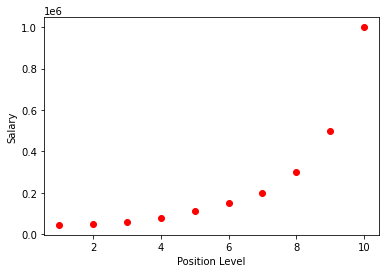

In [21]:
plt.scatter(X,Y,c="r")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X,Y)
pred = lin_reg.predict(X)

In [24]:
r2_score(Y,pred)

0.6690412331929895

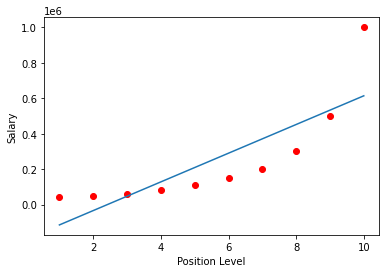

In [25]:
plt.scatter(X,Y,c="r")
plt.plot(X,pred)
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called Underfitting

### Fitting with Polynomial 

In [27]:
X.shape

(10, 1)

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X)
x_poly.shape

(10, 3)

In [33]:
lin_poly = LinearRegression()
lin_poly.fit(x_poly,Y)
poly_prd = lin_poly.predict(x_poly)

In [34]:
r2_score(Y,poly_prd)

0.9162082221443942

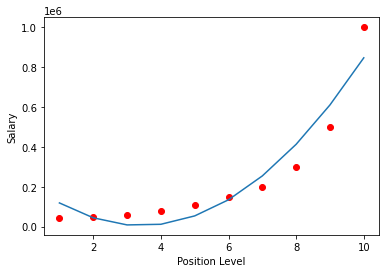

In [35]:
plt.scatter(X,Y,c="r")
plt.plot(X,poly_prd)
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

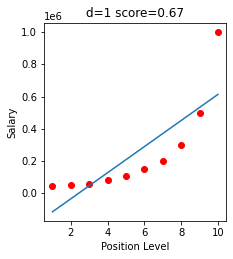

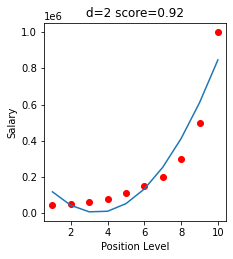

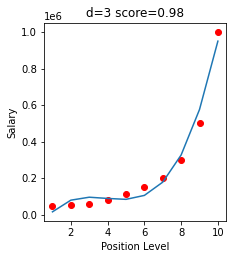

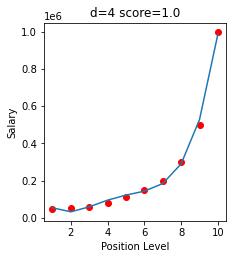

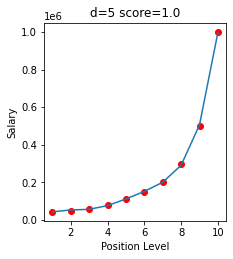

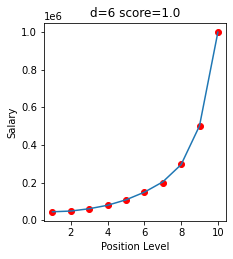

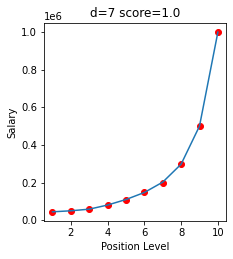

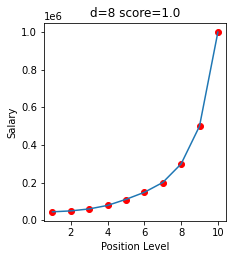

In [45]:

for i in range(1,9):
    plt.figure(figsize=(15,8))
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(X)
    
    lin_poly = LinearRegression()
    lin_poly.fit(x_poly,Y)
    poly_prd = lin_poly.predict(x_poly)
    sc = r2_score(Y, poly_prd)
    
    
    plt.subplot(2,4,i)
    plt.scatter(X,Y,c="r")
    plt.plot(X,poly_prd)
    plt.title("d={} score={}".format(i, round(sc,2)))
    plt.xlabel("Position Level")
    plt.ylabel("Salary")
    plt.show()